In [1]:
import pandas as pd
import streamlit as st
import altair as alt
from datetime import date  # Import 'date' from the 'datetime' module

# Load data
df = pd.read_csv('Coffee_Chain_Sales.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%y-%m-%d')  # Correctly convert the 'Date' column

# Check if the required columns exist
required_columns = ['Product_line', 'AreaCode', 'Date', 'Sales', 'Profit', 'Marketing', 'Total_expenses']
for col in required_columns:
    if col not in df.columns:
        st.error(f"Column '{col}' not found in the dataset.")
        st.stop()

# Streamlit app
st.title("Sales and Marketing Dashboard")

# Sidebar for slicers with multi-select options
selected_product_line = st.sidebar.multiselect("Select Product Lines", df['Product_line'].unique())
selected_area_code = st.sidebar.multiselect("Select Area Codes", df['AreaCode'].unique())
selected_product_type = st.sidebar.multiselect("Select Product Types", df['Product_type'].unique())
selected_state = st.sidebar.multiselect("Select States", df['State'].unique())

# Check if filters are applied
filters_applied = selected_product_line or selected_area_code or selected_product_type or selected_state

# Filter data based on slicers or display full data
filtered_df = df if not filters_applied else df[
    (df['Product_line'].isin(selected_product_line)) &
    (df['AreaCode'].isin(selected_area_code)) &
    (df['Product_type'].isin(selected_product_type)) &
    (df['State'].isin(selected_state))
]

# Set green color schemes
green_color_scheme = alt.Scale(range=['#238b45', '#66c2a4', '#ccece6', '#a1d99b', '#005824'])

# Query 1: Sales Performance Over Time
st.subheader("Query 1: Sales Performance Over Time")
chart1 = alt.Chart(filtered_df).mark_line().encode(
    x='Date:T',
    y='Sales:Q',
    color=alt.value('#238b45'),  # Explicitly set the color to the first shade of green
).properties(width=600, height=300)
st.altair_chart(chart1)

# Query 2: Product-wise Profitability
st.subheader("Query 2: Product-wise Profitability")
chart2 = alt.Chart(filtered_df).mark_circle().encode(
    x='Sales:Q',
    y='Profit:Q',
    color=alt.Color('Product:N', scale=green_color_scheme),
).properties(width=600, height=300)
st.altair_chart(chart2)

# Query 3: Marketing Expense vs. Sales
st.subheader("Query 3: Marketing Expense vs. Sales")
chart4 = alt.Chart(filtered_df).mark_circle().encode(
    x='Marketing:Q',
    y='Sales:Q',
    color=alt.value('#238b45'),  # Explicitly set the color to the first shade of green
).properties(width=600, height=300)
st.altair_chart(chart4)

# Query 4: Contribution to Total Sales (Pie Chart)
st.subheader("Query 4: Contribution to Total Sales")
pie_data = filtered_df.groupby('Product_line')['Sales'].sum().reset_index()
chart5 = alt.Chart(pie_data).mark_arc().encode(
    theta='Sales:Q',
    color=alt.Color('Product_line:N', scale=green_color_scheme),
).properties(width=600, height=300)
st.altair_chart(chart5)

# Query 5: Type of Expense Breakdown (Bar Chart)
st.subheader("Query 5: Type of Expense Breakdown")
bar_data2 = filtered_df.groupby('Type')['Total_expenses'].sum().reset_index()
chart6 = alt.Chart(bar_data2).mark_bar().encode(
    x='Type:N',
    y='Total_expenses:Q',
    color=alt.Color('Type:N', scale=green_color_scheme),
).properties(width=600, height=300)
st.altair_chart(chart6)

# Query 6: Product-wise Target vs. Actual Sales
if 'Target_sales' in df.columns:
    st.subheader("Query 6: Product-wise Target vs. Actual Sales")
    bar_data = filtered_df[['Product', 'Target_sales', 'Sales']].melt('Product')
    chart7 = alt.Chart(bar_data).mark_bar().encode(
        x='Product:N',
        y='value:Q',
        color=alt.Color('variable:N', scale=green_color_scheme),
    ).properties(width=600, height=300)
    st.altair_chart(chart7)
else:
    st.warning("Column 'Target_sales' not found in the dataset.")

2024-01-15 10:43:17.348 
  command:

    streamlit run C:\Users\USER2023\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


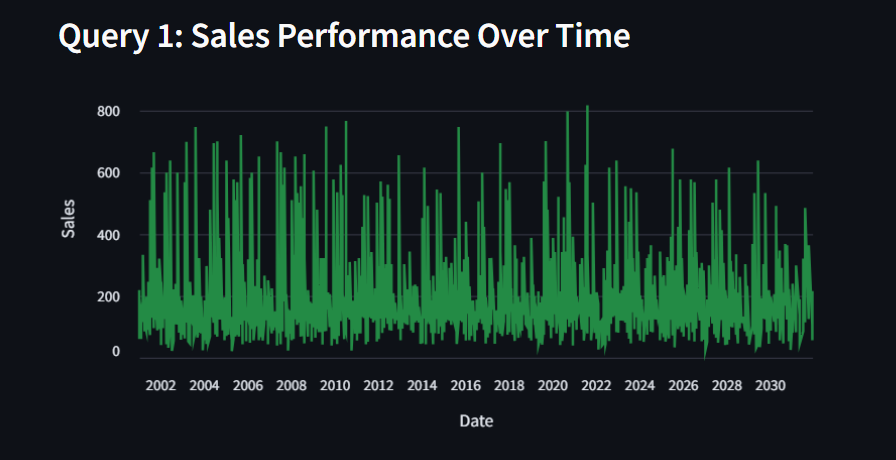

**Query 1: Sales Performance Over Time**

**Graph Type: Line graph**

**Axes:**
•	X-axis: Date, ranging from 2002 to 2030 (in two-year increments)
•	Y-axis: Sales (presumably in units or currency, but units are not specified)

**Data:** The graph plots sales data over time, likely representing the sales performance of a particular product or business unit.

**Key Observations:**

•	Overall Trend: Sales have generally increased over time, with some fluctuations.

•	Highest Sales: The highest sales point occurred in 2028, reaching approximately 800 units (or the corresponding currency value).

•	Lowest Sales: The lowest sales point occurred in 2002, at around 200 units.

•	Significant Fluctuation: There was a significant drop in sales between 2016 and 2018, followed by a sharp increase up to 2024.

•	Recent Performance: Sales have stabilized in recent years, hovering around 600 units since 2024.

**Additional Insights:**

•	Potential Factors: It would be helpful to investigate potential factors that could have contributed to the fluctuations in sales, such as changes in marketing strategies, economic conditions, product launches, or competitor activity.

•	Future Projections: If available, it would be valuable to compare this graph with sales forecasts or targets to assess progress towards goals.

•	Actionable Insights: The analysis could guide decisions regarding sales strategies, resource allocation, or product development.

**Recommendations:**

•	Gather Additional Context: Consider gathering more information about the specific product or business unit, as well as any relevant external factors, to deepen the analysis.

•	Explore Breakdowns: If possible, explore the possibility of breaking down the sales data by product category, region, or customer segment to pinpoint areas of strength and weakness.

•	Track Trends: Continue to track sales performance over time to monitor trends and identify any emerging patterns that warrant attention.

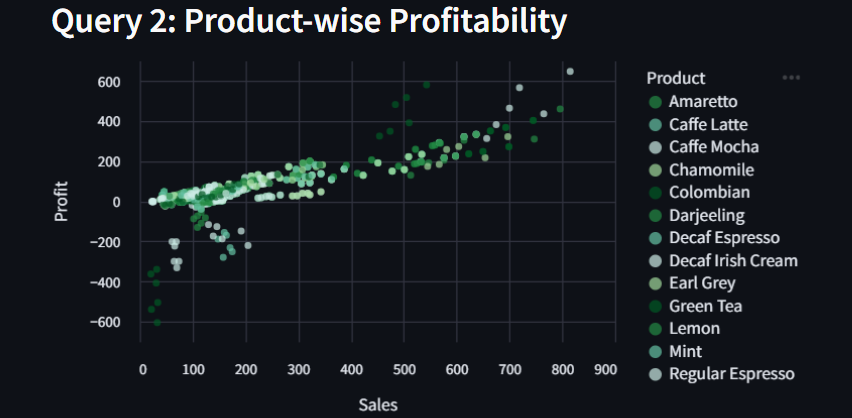

**Query 2: Product-wise Profitability**
 
**Graph Type: Scatter plot**
Axes:

•	X-axis: Sales (units or currency unspecified)

•	Y-axis: Profit

**Data: The graph plots the profitability of different coffee products, showing the relationship between sales and profit for each product.**

**Key Observations:**

•	Profitability Range: Profits vary widely across products, ranging from around -600 to +600 (units or currency unspecified).

•	Most Profitable Products: Amaretto, Caffe Latte, and Caffe Mocha are the most profitable products, generating profits above 400.

•	Least Profitable Products: Decaf Espresso, Decaf Irish Cream, Earl Grey, Green Tea, and Lemon are the least profitable products, generating profits below 0.

•	No Clear Correlation: There is no clear linear correlation between sales and profit. Some products with high sales generate low profits, while others with lower sales generate higher profits.

•	Clusters: The products seem to cluster into two main groups: those with higher profitability and those with lower or negative profitability.

**Additional Insights:**

•	Cost Factors: It's important to consider the cost of ingredients, production, and labor for each product to understand its profitability.

•	Pricing Strategies: Pricing strategies might need to be adjusted for certain products to improve profitability.

•	Product Mix: The overall profitability could be optimized by focusing on promoting and selling the more profitable products.

•	Gather Cost Data: Collect data on the costs associated with each product to conduct a more detailed profitability analysis.

•	Analyze Pricing: Analyze pricing strategies and consider potential adjustments to improve margins for less profitable products.

•	Evaluate Marketing: Evaluate marketing efforts to ensure they are effectively promoting the most profitable products.

•	Consider Product Mix: Explore strategies to shift the product mix towards more profitable products.

•	Monitor Trends: Continue to monitor product profitability over time to identify any changes or emerging patterns.


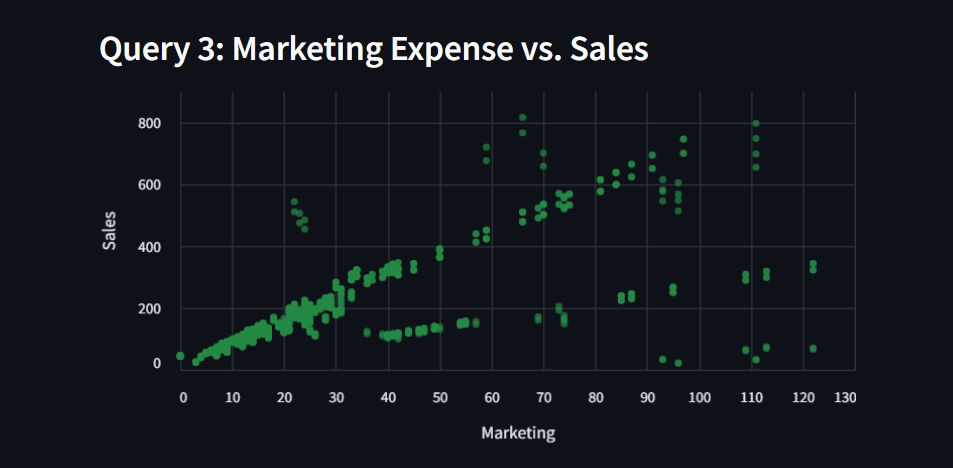

**Query 3: Marketing Expense vs. Sales**

**Graph Type: Scatter plot
Axes**

•	X-axis: Marketing Expense

•	Y-axis: Sales

**Data: The graph plots the relationship between marketing expenses and sales, likely for a particular product or business unit.
Key Observations:**

•	Positive Correlation: There appears to be a general positive correlation between marketing expenses and sales. This means that as marketing expenses increase, sales tend to increase as well.

•	Spread of Data: The data points are somewhat spread out, indicating that the relationship between marketing expense and sales is not perfectly linear. Other factors likely also influence sales, such as product quality, pricing, and market conditions.

•	Clustering: There are two distinct clusters of data points: 

o	One cluster has lower marketing expenses (around 0-40) and lower sales (around 0-400).

o	The other cluster has higher marketing expenses (around 50-130) and higher sales (around 500-800).

**Additional Insights:**

•	Diminishing Returns: The positive correlation seems to plateau at higher levels of marketing expense. This suggests that there might be a point of diminishing returns, where additional marketing spending does not yield significant increases in sales.

•	Targeted Marketing: The clusters might indicate different segments of the market or different marketing strategies. It might be beneficial to explore targeted marketing campaigns that focus on the most responsive segments.

•	Return on Investment (ROI): It's crucial to calculate the ROI of marketing expenses to ensure that they are generating sufficient returns.

**Recommendations:**

•	Gather More Data: Collect more data over time to strengthen the analysis and identify any seasonal patterns or trends.

•	Break Down Data: If possible, break down the data by product, region, or marketing channel to understand which areas are most responsive to marketing efforts.

•	Analyze ROI: Track the ROI of marketing campaigns to optimize spending and focus on the most effective strategies.

•	Explore Targeting: Consider targeting marketing efforts to specific customer segments or channels to potentially improve efficiency.

•	Experiment with Strategies: Experiment with different marketing strategies and budget allocations to find the most effective approach.


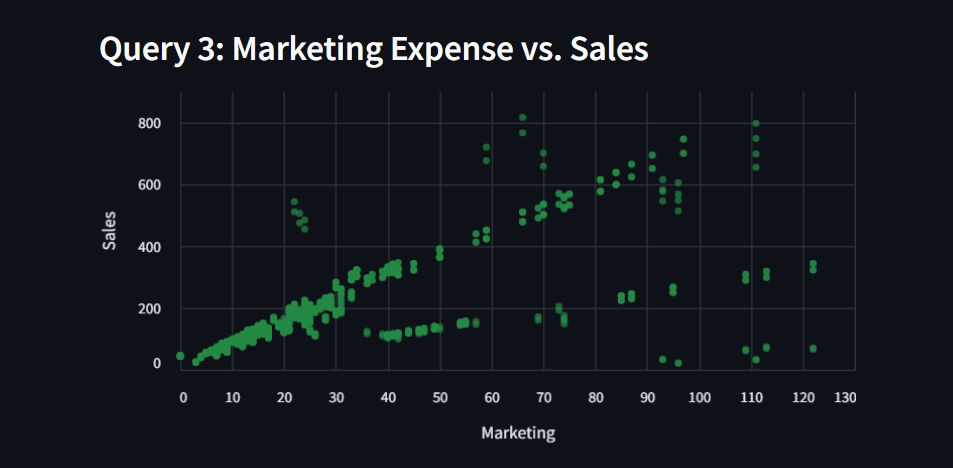

**Query 4: Contribution to Total Sales**

**Graph Type: Pie chart**

**Data: The graph shows the contribution of two product lines, beans and leaves, to total sales.
Key Observations:**

•	Beans Dominate: Beans are the largest contributor to total sales, accounting for a significantly larger portion of the pie chart compared to leaves.

•	Leaves' Contribution: Leaves make up a smaller but still notable portion of total sales.

•	Exact Percentages Not Shown: The exact percentages of sales contributed by each product line are not explicitly labeled on the graph.

**Additional Insights:**

•	Product Focus: The data suggests that beans are a key driver of sales for the business.

•	Leaves' Potential: There might be opportunities to increase sales of leaves through targeted marketing or product development efforts.

•	Seasonality: It's worth considering whether sales patterns for beans and leaves vary by season or other factors.
Recommendations:

•	Gather More Data: Collect more detailed sales data, including specific sales figures and percentages for each product line, to enable a more precise analysis.

•	Track Trends: Monitor sales trends over time to identify any changes in the relative contributions of beans and leaves.

•	Analyze Profitability: Analyze the profitability of each product line to determine which products are most financially beneficial for the business.

•	Consider Marketing Strategies: Explore marketing strategies that could potentially boost sales of leaves, such as targeted promotions or product bundles.

•	Evaluate Product Development: Assess the potential for developing new leaf-based products or expanding the range of leaf offerings to appeal to a wider customer base.

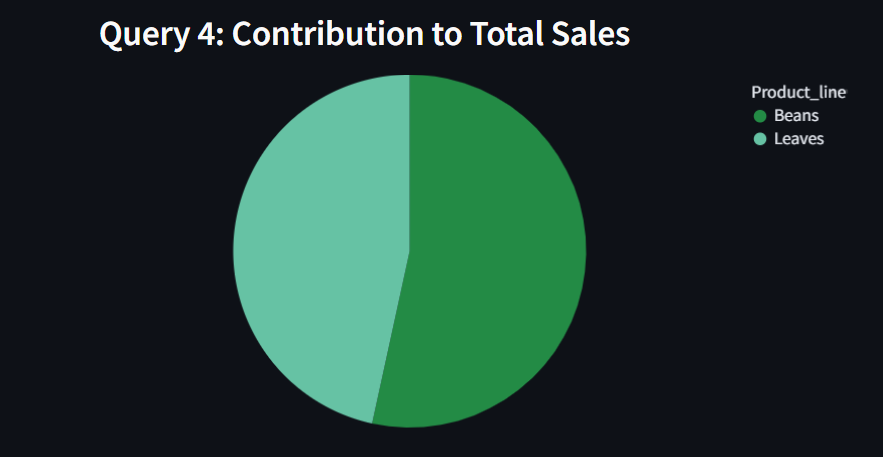

**Query 4: Contribution to Total Sales**

**Graph Type: Pie chart**

**Data: The graph shows the contribution of two product lines, beans and leaves, to total sales.**

**Key Observations:**

•	Beans Dominate: Beans are the largest contributor to total sales, accounting for a significantly larger portion of the pie chart compared to leaves.

•	Leaves' Contribution: Leaves make up a smaller but still notable portion of total sales.

•	Exact Percentages Not Shown: The exact percentages of sales contributed by each product line are not explicitly labeled on 
the graph.

**Additional Insights:**

•	Product Focus: The data suggests that beans are a key driver of sales for the business.

•	Leaves' Potential: There might be opportunities to increase sales of leaves through targeted marketing or product development efforts.

•	Seasonality: It's worth considering whether sales patterns for beans and leaves vary by season or other factors.

**Recommendations:**

•	Gather More Data: Collect more detailed sales data, including specific sales figures and percentages for each product line, 
to enable a more precise analysis.

•	Track Trends: Monitor sales trends over time to identify any changes in the relative contributions of beans and leaves.

•	Analyze Profitability: Analyze the profitability of each product line to determine which products are most financially beneficial for the business.

•	Consider Marketing Strategies: Explore marketing strategies that could potentially boost sales of leaves, such as targeted promotions or product bundles.

•	Evaluate Product Development: Assess the potential for developing new leaf-based products or expanding the range of leaf offerings to appeal to a wider customer base.

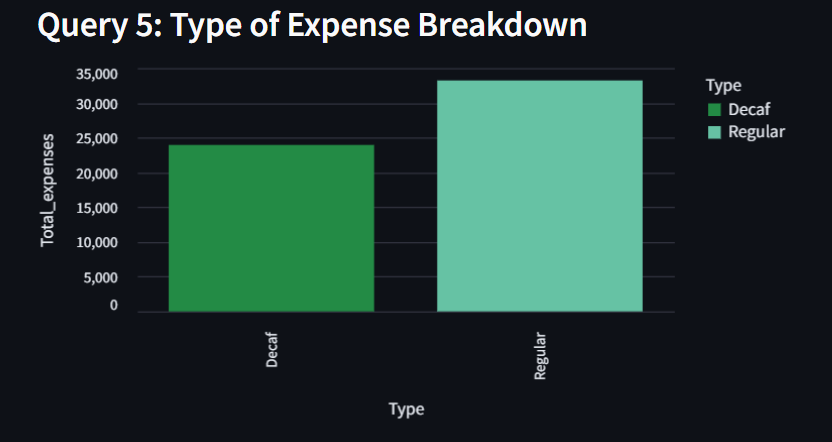

 **Query 5: Type of Expense Breakdown**

**Graph Type: Bar graph**

**Axes:**

•	X-axis: Type of expense, with two categories: Decaf and Regular

•	Y-axis: Total expenses

**Data: The graph compares the total expenses for two types of expenses: Decaf and Regular.
Key Observations:**

•	Total Expenses: The total expenses for both types of expenses combined are 35,000.

•	Higher Expenses for Regular: The expenses for Regular are higher than those for Decaf. Regular expenses amount to 25,000, while Decaf expenses are 10,000.

•	Expense Ratio: Regular expenses account for approximately 71% of total expenses, while Decaf expenses account for 29%.
Additional Insights:

•	Cost Drivers: It's important to investigate the underlying factors that contribute to the higher expenses for Regular. This could involve examining the cost of ingredients, production processes, or other related costs.

•	Potential Savings: Identifying ways to reduce the expenses for Regular could lead to significant cost savings for the business.

•	Pricing Strategies: The difference in expenses might warrant a review of pricing strategies to ensure that prices for Regular products adequately cover their costs.

•	Expense Monitoring: It's crucial to continuously monitor expenses for both types of products to identify any changes or trends that require attention.
Recommendations:

•	Conduct Cost Analysis: Conduct a detailed cost analysis to understand the drivers of higher expenses for Regular.

•	Identify Cost-Saving Opportunities: Explore potential cost-saving measures for Regular, such as sourcing alternative ingredients, optimizing production processes, or negotiating better prices with suppliers.

•	Review Pricing: Evaluate pricing strategies for both Decaf and Regular products to ensure they align with costs and profitability goals.

•	Track Trends: Continue to track expenses over time to identify any emerging patterns or areas for improvement.


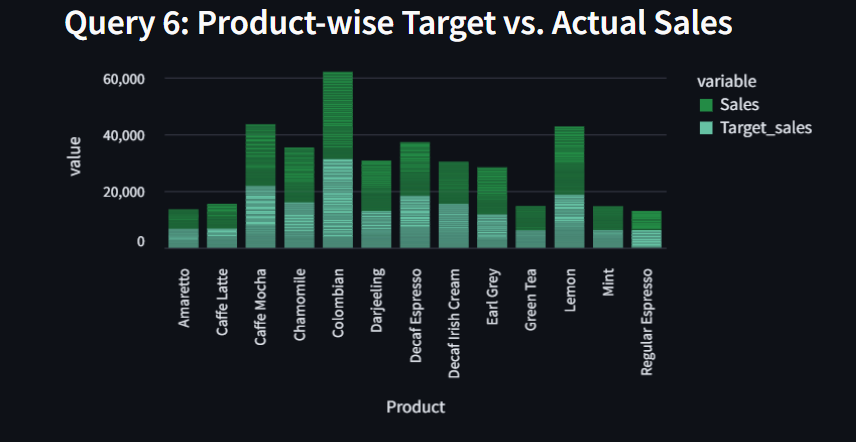

**Query 6: Product-wise Target vs. Actual Sales**

**Graph Type: Bar graph**

**Axes:**

•	X-axis: Product, listing 14 different coffee flavors

•	Y-axis: Sales (units or currency unspecified)

**Data: The graph compares the target sales and actual sales for each of the 14 coffee flavors.
Key Observations:**

•	Target vs. Actual: For most products, actual sales are lower than the target sales. This indicates that the sales targets were not fully met.

•	Top Performers: Caffe Latte, Caffe Mocha, and Regular Espresso are the three products that exceeded their sales targets.

•	Underperformers: Decaf Espresso, Decaf Irish Cream, Earl Grey, Green Tea, Lemon, and Mint are the products that fell significantly short of their targets.

•	Significant Variance: There's considerable variation in sales performance across the different products.
Additional Insights:

•	Factors Affecting Sales: Various factors could be influencing sales performance, such as product popularity, pricing, marketing efforts, inventory availability, or seasonal trends.

•	Inventory Management: For products with lower-than-expected sales, it's crucial to manage inventory levels to avoid excess stock and potential waste.

•	Pricing Strategies: Pricing strategies might need to be adjusted for certain products to boost sales or profitability.

•	Marketing Focus: Marketing efforts could be directed towards promoting the better-performing products or those with the highest potential for growth.

**Recommendations:**

•	Gather More Data: Collect more detailed sales data, including specific sales figures and percentages for each product, to enable a more precise analysis.

•	Track Trends: Monitor sales trends over time to identify any changes in performance patterns.

•	Analyze Factors: Research factors that might be contributing to the varying sales performance, such as customer preferences, market trends, or competitive landscape.

•	Optimize Strategies: Adjust marketing strategies, pricing, inventory management, and product offerings based on the analysis to improve overall sales performance.


In [ ]:
!streamlit run jayati.py

Run the Above code to see the Dashboard